# **Machine Learning**

ML is the process in which computers make decision from data without explicitly programmed to do so!

Example:

* Classifying emails to spam or not spam.
* Clustering colors into RGB in an image.

# **Unsupervised Learning**

A learning algorithm where the model learns from unlabeled data to uncover hidden patterns from unseen data.

Example:

* Grouping customers into distinct categories.

## **Type of Unsupervised Learning**

### **Clustering**

An unsupervised learning algorithm that is used to create clusters out of unlabeled data.

# **Supervised Learning**

A learning algorithm where the model learns from labeled data to make prediction from unseen data.

Example:
* Predicting house prices based on the age and the size of the house.

## **Types of Supervised Learning**

### **Regression**

A supervised learning algorithm that is used to predict continuous values.

### **Classification**

A supervised learning algorithm that is used to predict categorical values.

## **Terminology**

* Feautre == Predictor Variable == Independent Variable
* Target Variable == Dependent Variable == Response Variable

## **Data Requirements for Supervised Learning**

* No missing values: `None` or `np.NaN`.
* Data must be in numeric format: `int`, `float`, `np.float32`, `np.float64`.
* Data stored in
  * Pandas or Polar DataFrame
  * Numpy or Jax array

# **Scikit-Learn**

A Python machine learning library.

## **Syntax**

In general, we need to
* import the library
* split the dataset into train (80%), test (10%), and validation (10%) sets with a sample and label sets each
* create the model
* fit the train sample and label sets into the model
* make prediction

(General) Example:

```python
from sklearn.model_selection import train_test_split
from sklearn.module import Model

X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=0.2, train_size=0.8, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.1, random_state=42)
model = Model()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)
```
```shell
array([0, 0, 0, 0, 1, 0])
```

# **Classification**

## **K-Nearest Neighbors**

A classification algorithm that predicts the label of a data point by
* looking at the `k` closest labeled data points and
* taking a majority vote

Here is an example of classification using KNN:

In [9]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

churn_df = pd.read_csv("../data/chapter1/customer_churn.csv")

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

X = churn_df.drop("Churn", axis=1).values
y = churn_df["Churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=12)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

print("Accuracy:", knn.score(X_test, y_test))

Accuracy: 0.8571428571428571


In [10]:
import numpy as np

neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(neighbor)

	# Fit the model
	knn.fit(X_train, y_train)

	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 0.9928571428571429, 2: 0.9281746031746032, 3: 0.928968253968254, 4: 0.8992063492063492, 5: 0.8956349206349207, 6: 0.8888888888888888, 7: 0.8837301587301587, 8: 0.878968253968254, 9: 0.8785714285714286, 10: 0.8793650793650793, 11: 0.878968253968254, 12: 0.8734126984126984} 
 {1: 0.8761904761904762, 2: 0.8603174603174604, 3: 0.8492063492063492, 4: 0.8476190476190476, 5: 0.846031746031746, 6: 0.8476190476190476, 7: 0.8412698412698413, 8: 0.8523809523809524, 9: 0.846031746031746, 10: 0.8523809523809524, 11: 0.8587301587301587, 12: 0.8571428571428571}


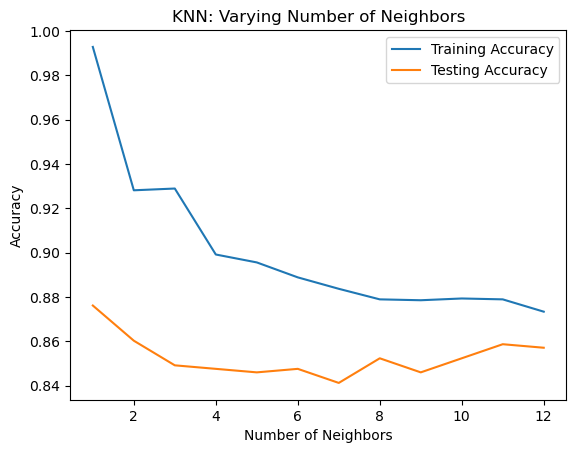

In [11]:
import matplotlib.pyplot as plt

plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()